## PCA Implementation

###### LOADING PATHS OF AVAILABLE DATASETS

In [1]:
Datasets_list = ["movement_libras","movement_libras_1","movement_libras_5",
                 "movement_libras_8","movement_libras_9","movement_libras_10"]
Datasets_dirs = list()
for dataset in Datasets_list:
    Datasets_dirs.append("LibrasDatasets/"+str(dataset)+".data")

In [ ]:
## Install packages if not [Requirements]
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn

#### MODULES USED

In [2]:
# for basic math operations and data loading
import pandas as pd
import numpy as np

# for plotting graphs
import seaborn as sb
import matplotlib.pyplot as plt

#### DATA PREPARATION CLASS

In [3]:
## Below follows data preparation class which contains all required functions and data members
class prepareData:
    
    def __init__(self, dataset_dir, printIT=False): 
        self.dataset_dir = dataset_dir
        self.printIT = printIT
    
    def load_dataset(self):
        data_col_names = list() 
        for i in range(90):
            data_col_names.append("X_col"+str(i+1))
        data_col_names.append("Y_col")

        data = pd.read_csv(self.dataset_dir, names=data_col_names)
        # data.head()
        
        ## PREPARE X AND Y
        X = data.drop(['Y_col'], axis=1)
        Y = data['Y_col']
        if(self.printIT):
            print("X data : ",X)
            print("Y classes : ",Y)
        return X,Y
    
    def std_dataset(self, X):
        ## STANDARDIZE DATASET

        _mean = np.mean(X, axis=0)
        _scale = np.std(X - _mean, axis=0)
        _X = (X - _mean)/_scale # _X is standardized data
        
         # making NAN to numbers for datatype consitency. Althoght no value is missing in Libras Datasets
        _X = np.nan_to_num(_X) 
        if(self.printIT):
            print("std X data : ",_X)
        return _X
    

In [4]:
# For Testing
prepareDataInst = prepareData(Datasets_dirs[0], False)
X, Y = prepareDataInst.load_dataset()
_X = prepareDataInst.std_dataset(X)
_X

array([[ 1.15937304, -0.92951044,  1.16413245, ..., -0.82149815,
         0.64799276, -0.8909614 ],
       [ 0.56538106, -1.51057836,  0.57805964, ...,  1.24028011,
        -1.4220029 ,  1.1983437 ],
       [ 0.77958869, -1.70841598,  0.79292607, ..., -1.0729544 ,
         1.28357889, -0.97597143],
       ...,
       [ 0.22456186,  1.08582686,  0.22644625, ...,  0.30994632,
        -0.21095664,  0.27514529],
       [ 0.46796818,  1.25893478,  0.46085517, ...,  0.33509195,
         0.21854026,  0.29944137],
       [ 0.37060565,  0.87565108,  0.3827357 , ...,  0.17167254,
         0.12404384,  0.15371739]])

#### PCA CLASS WITH ALL REQUIRED MEMBERS AND FUNCTIONS

In [5]:
## Below follows PCA class which contains all required functions and data members
class PCA:
    
    def __init__(self, dataset_dir, components, printIT=False): 
        self.dataset_dir = dataset_dir
        self.components = components
        self.printIT = printIT
        
    def compute(self, _X):
        ## Compute Covariance Matrix and reporting Eigen values and vectors afterwards
        covar_mat = np.cov(_X.transpose()) # cov of _X transpose
        eigenArray = np.linalg.eigh(covar_mat)
        eigenValues = eigenArray[0]
        eigenVectors = eigenArray[1]
        if(self.printIT):
            print(covar_mat[:5])
        # print(eigen_values[:5])
        # print(eigen_vectors.shape)
        
        explained_variances = list()
        for i in range(len(eigenValues)):
            explained_variances.append(eigenValues[i] / np.sum(eigenValues))
        # print(np.sum(explained_variances), '\n', explained_variances)
        
        ## Arrange eigen vectors and values
        idx = np.argsort(eigenValues)[::-1]
        _EigVals = np.array(eigenValues)[idx]
        _EigVec = np.array(eigenVectors)[:,idx]
        
        ## Finding principal compnents
        PCs_required = self.components # if equal 2 --> 2D [This can be visualized easily by us and python tools graphically]

        ## Transform data X by taking dot product
        _X_reduced = np.dot((_EigVec[:,0:PCs_required]).T , _X.T ).T
        # print(_X_reduced)
        
        if(self.printIT):
            print("Reduced X : ", _X_reduced)
            print("Eigen values : ",_EigVals)
            print("Eigen vectors : ",_EigVec)
            
        return _X_reduced, _EigVals, _EigVec
    
    def displayPC_Table(self, _X_reduced, Y):
        ## Make table of X PCs and Y
        PC_col_names = list()
        for i in range(self.components):
            PC_col_names.append("Principal Component -"+str(i+1))

        PCtable = pd.DataFrame(_X_reduced , columns = PC_col_names)
        PCtable = pd.concat([PCtable , pd.DataFrame(Y)] , axis = 1)
        
        if(self.printIT):
            print(PCtable[:5])
        return PCtable
        
    def plotResults(self, PCtable):
        ## Plotting Results using seaborn and matplotlib 
        if self.components==2:    
            plt.figure(figsize = (8,7))
            plt.title("REDUCED DIMENSION PLOT")
            sb.scatterplot(data=PCtable,x='Principal Component -1',y='Principal Component -2',hue='Y_col',s=100,palette='Set2')
        else:
            print("Cannot visualize higher dimensional data")
            
        return None

#### MAIN FUNCTION TO SIMULATE PCA VIA CLASS INSTANCE

In [6]:
prepareDataInst = prepareData(Datasets_dirs[0], False) # instance of data preparation class
X, Y = prepareDataInst.load_dataset()
_X = prepareDataInst.std_dataset(X)

pcaInst = PCA(Datasets_dirs[0], 2, False) # instance of PCA class
_X_reduced, _EigVals, _EigVec = pcaInst.compute(_X) # Compute function has steps involved in PCA implementation
PCtable = pcaInst.displayPC_Table(_X_reduced, Y)

In [11]:
print("EIGEN VALUES --> ",_EigVals)

EIGEN VALUES -->  [2.11137455e+01 1.89491506e+01 1.61225203e+01 1.16711225e+01
 5.51957859e+00 5.33013080e+00 2.98187609e+00 2.46612250e+00
 1.95631178e+00 1.56474463e+00 5.39658605e-01 4.90932995e-01
 4.30660116e-01 3.00055078e-01 2.39335465e-01 1.65488708e-01
 9.65313766e-02 7.76539462e-02 3.92992370e-02 3.46838740e-02
 2.48027630e-02 1.75955087e-02 1.37563732e-02 1.28377546e-02
 1.08166345e-02 9.57029759e-03 8.38739428e-03 6.68384253e-03
 6.15687630e-03 4.49858418e-03 4.04232004e-03 3.48494730e-03
 3.17461573e-03 2.80143143e-03 2.65357871e-03 2.49737653e-03
 2.13976083e-03 1.99461286e-03 1.84886339e-03 1.73232058e-03
 1.41167871e-03 1.31808403e-03 1.22764885e-03 1.12653220e-03
 1.09698605e-03 1.02672885e-03 9.82603645e-04 8.60272704e-04
 8.05769548e-04 7.31301600e-04 6.66777885e-04 6.21146965e-04
 5.84153089e-04 5.15746400e-04 4.63061936e-04 4.35182699e-04
 4.19490280e-04 3.98515767e-04 3.80851347e-04 3.72760426e-04
 3.51658508e-04 3.06306454e-04 2.84327113e-04 2.72387069e-04
 2.405

In [15]:
print("EIGEN VECTORS --> ",_EigVec)

EIGEN VECTORS -->  [[-0.13100049  0.06285489  0.14701312 ...  0.15230502 -0.14153136
  -0.2533547 ]
 [-0.16883043 -0.05836495 -0.09357332 ...  0.10344084 -0.06882449
   0.01347445]
 [-0.13101386  0.0633448   0.14727996 ... -0.13756554  0.24697727
   0.57370803]
 ...
 [ 0.06541976 -0.07656289  0.15006889 ... -0.00780841 -0.00502825
  -0.00081992]
 [ 0.09099747  0.10353127 -0.09308224 ... -0.00314146 -0.08253609
   0.02679007]
 [ 0.06166266 -0.07503708  0.14923162 ...  0.00259705  0.0081485
  -0.00604686]]


In [7]:
print("PC TABLE --> ")
df = pd.DataFrame(PCtable)  
df.style.set_table_styles([{'selector' : '', 'props' : [('border','10px solid yellow')]}])
# df.head()
df.sample(n=5)

PC TABLE --> 


,Principal Component -1,Principal Component -2,Y_col
61,0.453196,-3.456530,3
189,-4.964112,-8.332198,8
249,-5.748476,4.966405,11
95,5.460189,-5.624988,4
97,2.044911,6.247680,5


In [16]:
_EigVals[:5]

array([21.11374555, 18.9491506 , 16.12252029, 11.6711225 ,  5.51957859])

In [18]:
components = 2
(_EigVec[:,0:components])

array([[-0.13100049,  0.06285489],
       [-0.16883043, -0.05836495],
       [-0.13101386,  0.0633448 ],
       [-0.16894926, -0.05771133],
       [-0.13080585,  0.06406005],
       [-0.16920394, -0.05726793],
       [-0.13028915,  0.0653034 ],
       [-0.16918225, -0.05637093],
       [-0.12908567,  0.0682938 ],
       [-0.16859531, -0.05521272],
       [-0.12666549,  0.07248751],
       [-0.16838881, -0.05362425],
       [-0.12312866,  0.07728229],
       [-0.16758967, -0.05224366],
       [-0.11861928,  0.08166294],
       [-0.16614566, -0.05098737],
       [-0.11315534,  0.08580203],
       [-0.16355964, -0.05101697],
       [-0.10703809,  0.08958811],
       [-0.15857323, -0.05282087],
       [-0.10216234,  0.0935039 ],
       [-0.15056251, -0.05491426],
       [-0.09869556,  0.09772061],
       [-0.14191143, -0.05759001],
       [-0.09720534,  0.10258617],
       [-0.13257648, -0.06002047],
       [-0.09714193,  0.10835138],
       [-0.12831637, -0.06381206],
       [-0.09870956,

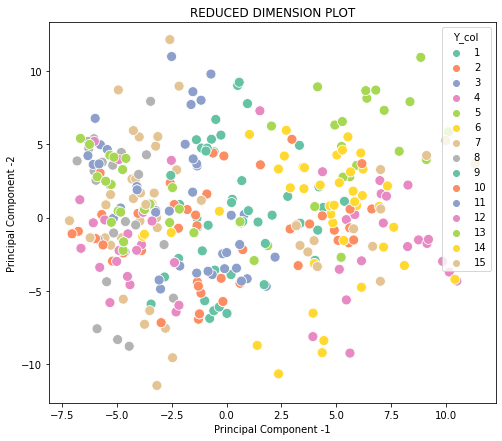

In [10]:
pcaInst.plotResults(PCtable) # plot results

In [ ]:
# Uncomment this to run for all Libras Datasets
# for dataset in Datasets_dirs:
#     print("DATASET IS : ",dataset)
        
#     prepareDataInst = prepareData(dataset, False) # instance of data preparation class
#     X, Y = prepareDataInst.load_dataset()
#     _X = prepareDataInst.std_dataset(X)
#     pcaInst = PCA(Datasets_dirs[0], 2, False) # instance of PCA class
#     _X_reduced, _EigVals, _EigVec = pcaInst.compute(_X) # Compute function has steps involved in PCA implementation
#     PCtable = pcaInst.displayPC_Table(_X_reduced, Y)
#     pcaInst.plotResults(PCtable) # plot results

This way PCA helps to reduce dimension of dataset which can make computation faster for ML models due to less parameters
and provides us with the top appropriate columns of the data that define it well.